In [42]:
#Abstract
# El concepto de abandono o “churn” de clientes, definido como la cantidad de 
# consumidores que deja de contratar un servicio en un periodo determinado de tiempo ha 
# cobrado mucha importancia en el último tiempo. Entender cuáles son los principales 
# motivos por los que un cliente decide dar de baja el servicio se considera una habilidad 
# fundamental dentro de la inteligencia de mercado puesto que permite a las empresas 
# tomar acciones de negocio oportunas para retener al cliente y anticiparse de esa forma 
# a posibles pérdidas. Si bien un análisis retrospectivo de tipo diagnóstico puede ser de 
# utilidad en una primera instancia para aproximarse a las causas del “churn”, para poder 
# explotar el concepto de forma completa se requieren herramientas analíticas 
# adicionales, particularmente aquellas que permitan hacer un análisis de tipo predictivo. 
# Es aquí donde la Ciencia de Datos, mediante el uso de algoritmos de clasificación 
# predictivos como el Machine Learning  (ML) se vuelve una disciplina sumamente 
# atractiva para ser incorporada dentro del stack tecnológico del buiseness intelligence. 
# El objetivo del proyecto es tratar de encontrar cuáles son las características de un cliente 
# relacionadas con sus variables demográficas y sus hábitos de consumo que nos permitan establecer
# un perfil de cliente con altas probabilidades de abandonar.
# Hipotesis general: Antes de dar de baja una tarjeta de crédito, un cliente da señales relacionadas con 
# con una disminución en sus hábitos de consumo y por lo tanto en el uso de la tarjeta.
# Hipótesis específicas:
# 1. Los clientes que abandonan el servicio de la tarjeta de crédito tienen menor consumo, tanto en términos de 
# cantidad de compras como de monto total gastado.
# 2. Para un determinado nivel de gasto, Los clientes que abandonan el servicio de la tarjeta de crédito 
# tienen menores ingresos (Income_Category) que los que conservan la tarjeta.
# 3. Los clientes que abandonan el servicio de la tarjeta de crédito tienen un mayor período de inactividad 
# ( Months_Inactive_12_mon) que los que conservan la tarjeta 
# 4. Los clientes que bandonan el servicio de la tarjeta de crédito tienen un menor período de relación con el banco
# (Month_on_Book) que los que conservan la tarjeta
# 5. Los clientes que bandonan el servicio de la tarjeta de crédito tienen una tasa de uso menor de la tarjeta 
# con respecto (Avg_Utilization_Ratio) a los que conservan la tarjeta




# Abstract
 El concepto de abandono o “churn” de clientes, definido como la cantidad de 
 consumidores que deja de contratar un servicio en un periodo determinado de tiempo ha 
 cobrado mucha importancia en el último tiempo. Entender cuáles son los principales 
 motivos por los que un cliente decide dar de baja el servicio se considera una habilidad 
 fundamental dentro de la inteligencia de mercado puesto que permite a las empresas 
 tomar acciones de negocio oportunas para retener al cliente y anticiparse de esa forma 
 a posibles pérdidas. Si bien un análisis retrospectivo de tipo diagnóstico puede ser de 
 utilidad en una primera instancia para aproximarse a las causas del “churn”, para poder 
 explotar el concepto de forma completa se requieren herramientas analíticas 
 adicionales, particularmente aquellas que permitan hacer un análisis de tipo predictivo. 
 Es aquí donde la Ciencia de Datos, mediante el uso de algoritmos de clasificación 
 predictivos como el Machine Learning  (ML) se vuelve una disciplina sumamente 
 atractiva para ser incorporada dentro del stack tecnológico del buiseness intelligence. 
 El objetivo del proyecto es tratar de encontrar cuáles son las características de un cliente 
 relacionadas con sus variables demográficas y sus hábitos de consumo que nos permitan establecer
 un perfil de cliente con altas probabilidades de abandonar.
 Hipotesis general: Antes de dar de baja una tarjeta de crédito, un cliente da señales relacionadas con 
 con una disminución en sus hábitos de consumo y por lo tanto en el uso de la tarjeta.
 Hipótesis específicas:
 1. Los clientes que abandonan el servicio de la tarjeta de crédito tienen menor consumo, tanto en términos de 
 cantidad de compras como de monto total gastado.
 2. Para un determinado nivel de gasto, Los clientes que abandonan el servicio de la tarjeta de crédito 
 tienen menores ingresos (Income_Category) que los que conservan la tarjeta.
 3. Los clientes que abandonan el servicio de la tarjeta de crédito tienen un mayor período de inactividad 
 ( Months_Inactive_12_mon) que los que conservan la tarjeta 
 4. Los clientes que bandonan el servicio de la tarjeta de crédito tienen un menor período de relación con el banco
 (Month_on_Book) que los que conservan la tarjeta
 5. Los clientes que bandonan el servicio de la tarjeta de crédito tienen una tasa de uso menor de la tarjeta 
 con respecto (Avg_Utilization_Ratio) a los que conservan la tarjeta


# Carga del dataset y primeras aproximaciones

In [43]:
#Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importo el dataset
df = pd.read_csv(r"C:\Users\agus_\OneDrive\Documentos\Curso_Data_Science_1_CH\Proyecto_final_DS_1\Dataset_1\dataset_1_credit_card_churn.csv")

#Elimino columnas por recomendacion del propietario del dataset.
df = df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

#Observo los tipos de variables que contiene el dataset
df.dtypes

#Transformo algunas variables numéricas que cobran sentido como variables categóricas
df["Dependent_count"] = df["Dependent_count"].astype(object)
df["Total_Relationship_Count"] = df["Total_Relationship_Count"].astype(object)
df["Contacts_Count_12_mon"] = df["Contacts_Count_12_mon"].astype(object)
df["Months_Inactive_12_mon"] = df["Months_Inactive_12_mon"].astype(object)

#Uso el identificador de cliente como índice
df = df.set_index(df["CLIENTNUM"])

#Separamos las variables numéricas y las categóricas.

lista_columnas = df.columns
lista_variables_categoricas = []
lista_variables_numericas = []
for i in lista_columnas:
  if df.dtypes[i] == "object":
    lista_variables_categoricas.append(i)
  else:
    lista_variables_numericas.append(i)



In [44]:
#Exploración inicial del dataset
info_df = df.info()
df.shape
df.describe().round(1).drop(columns="CLIENTNUM")
#Contiene 27 columnas, 10127 registros y no contiene valores de tipo NaN

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  object 
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  object 
 11  Months_Inactive_12_mon    10127 non-null  object 
 12  Contacts_Count_12_mon     10127 non-null  object 
 13  Credit_Limit              10127 non-null  float64
 14 

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0
mean,46.3,35.9,8632.0,1162.8,7469.1,0.8,4404.1,64.9,0.7,0.3
std,8.0,8.0,9088.8,815.0,9090.7,0.2,3397.1,23.5,0.2,0.3
min,26.0,13.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0
25%,41.0,31.0,2555.0,359.0,1324.5,0.6,2155.5,45.0,0.6,0.0
50%,46.0,36.0,4549.0,1276.0,3474.0,0.7,3899.0,67.0,0.7,0.2
75%,52.0,40.0,11067.5,1784.0,9859.0,0.9,4741.0,81.0,0.8,0.5
max,73.0,56.0,34516.0,2517.0,34516.0,3.4,18484.0,139.0,3.7,1.0


In [45]:
df["CLIENTNUM"].is_unique
#No hay clientes duplicados.

True

In [46]:
#Si bien no tiene valores NaN, el dataset contiene valores "Unknown" en algunas variables. 
# Cuento la cantidad de valores "Unknown" por columna
lista = df.columns
cuenta = []
for i in lista:
     cuenta.append(len(df[df[i] == "Unknown"])) 
valores_unknown = pd.DataFrame({"columna":lista, "Cantidad_Unknown":cuenta})
print(valores_unknown)

#Solo 3 columnas tienen valores Unknown:
#Education_level = 1519
#Marital_status = 749
#Income_Category = 1112

                     columna  Cantidad_Unknown
0                  CLIENTNUM                 0
1             Attrition_Flag                 0
2               Customer_Age                 0
3                     Gender                 0
4            Dependent_count                 0
5            Education_Level              1519
6             Marital_Status               749
7            Income_Category              1112
8              Card_Category                 0
9             Months_on_book                 0
10  Total_Relationship_Count                 0
11    Months_Inactive_12_mon                 0
12     Contacts_Count_12_mon                 0
13              Credit_Limit                 0
14       Total_Revolving_Bal                 0
15           Avg_Open_To_Buy                 0
16      Total_Amt_Chng_Q4_Q1                 0
17           Total_Trans_Amt                 0
18            Total_Trans_Ct                 0
19       Total_Ct_Chng_Q4_Q1                 0
20     Avg_Ut

In [47]:
# Como parte del análisis exploratorio inicial (EDA) propongo tratar de encontrar diferencias entre el grupo de clientes que
# abandonaron el servicio y aquellos que no lo hicieron. Como primera aproximación calculo la media y la mediana para las
# distintas variables numéricas agrupadas por la categoría Cliente existente/Cliente que abandonó.
df.groupby("Attrition_Flag").mean(numeric_only= True).round(1).drop(columns="CLIENTNUM")


,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,
Attrited Customer,46.7,36.2,8136.0,672.8,7463.2,0.7,3095.0,44.9,0.6,0.2
Existing Customer,46.3,35.9,8726.9,1256.6,7470.3,0.8,4654.7,68.7,0.7,0.3


In [48]:
df.groupby("Attrition_Flag").median(numeric_only= True).round(1).drop(columns="CLIENTNUM")

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,
Attrited Customer,47.0,36.0,4178.0,0.0,3488.0,0.7,2329.0,43.0,0.5,0.0
Existing Customer,46.0,36.0,4643.5,1364.0,3469.5,0.7,4100.0,71.0,0.7,0.2


# Análisis exploratorio inicial (EDA)

[Text(0.5, 0, 'Genero'),
 Text(0, 0.5, 'Porcentaje de clientes que abandonaron')]

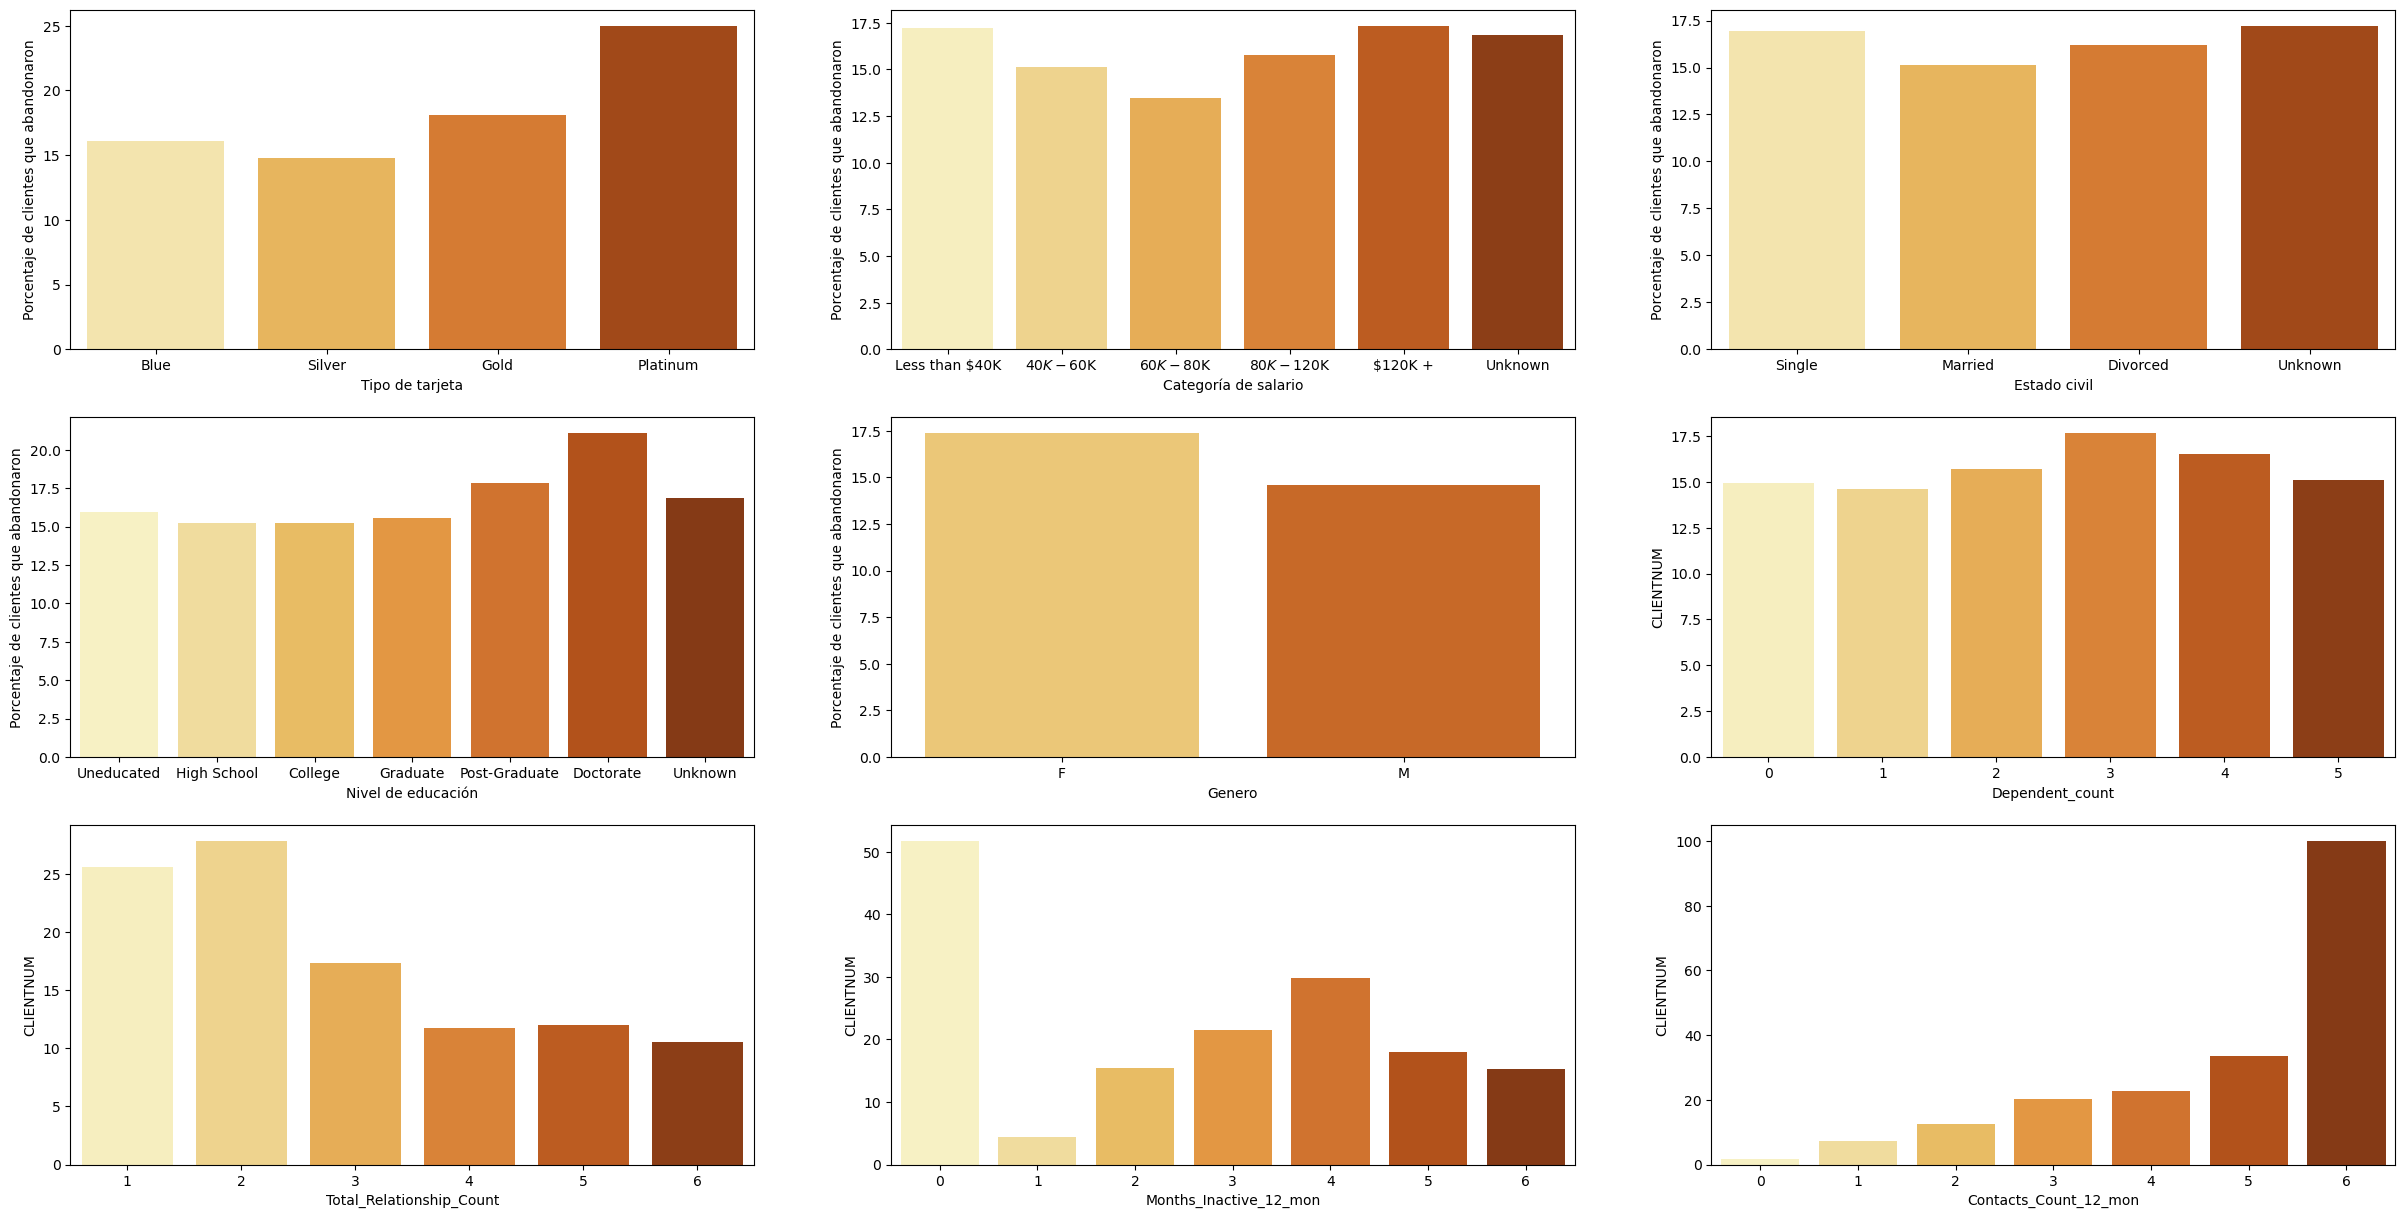

In [49]:
# Análisis de variables categóricas mediante gráficos de barras:
# Propongo establecer el % de clientes que abandonaron tomando como 100% el total de clientes por cada 
# variable categórica. El aumento del % de clientes que abandonaron en una de esas variables podría indicar que dicha 
# variable podría estar relacionada con el comportamiento de abandonar.
# Para eso realizo un bucle para calcular el porcentaje de clientes que abandonaron por categoría en cada una de 
# las variables categóricas del dataset. 
# El resultado es una lista, y cada elemento de la lista es un dataframe que contiene como índice las categorías de una 
# variable y como columna CLIENTNUM el porcentaje de clientes que abandonaron
lista_columnas = df.columns
df_attrited = df[df["Attrition_Flag"]=="Attrited Customer"]
lista_df_attrited_division = []
for i in lista_columnas:
    if df.dtypes[i] == "object":
        df_attrited_agrupado = df_attrited.groupby(i)["CLIENTNUM"].count()
        df_t = df.groupby(i)["CLIENTNUM"].count()
        df_attrited_division = (df_attrited_agrupado / df_t)*100
        df_attrited_division = df_attrited_division.to_frame()
        lista_df_attrited_division.append(df_attrited_division)
    else:
        continue

#Luego uso la información obtenida en el bucle para crear gráficos de barras.
#Defino variables para establecer el orden de las s}distintas categorías en los gráficos de barra
salarios = df["Income_Category"].unique()
tarjetas = df["Card_Category"].unique()
estado_civil = df["Marital_Status"].unique()
eduacion = df["Education_Level"].unique()
salarios = [salarios[1], salarios[3], salarios[0], salarios[2], salarios[4], salarios[5]] 
tarjetas = [tarjetas[0], tarjetas[2], tarjetas[1], tarjetas[3]]
estado_civil = [estado_civil[1], estado_civil[0], estado_civil[3], estado_civil[2]]
eduacion = [eduacion[2], eduacion[0], eduacion[4], eduacion[1], eduacion[5], eduacion[6], eduacion[3]]

#Creo los gráficos de barras usando los dataframes guardados en la list que resultó del bucle for.
f, axs = plt.subplots(3, 3, figsize=(30, 15), gridspec_kw=dict(width_ratios=[5, 5, 5]))
bp0 = sns.barplot(data=lista_df_attrited_division[6], x=lista_df_attrited_division[6].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[0, 0], order = tarjetas)
bp1 = sns.barplot(data=lista_df_attrited_division[5], x=lista_df_attrited_division[5].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[0, 1], order = salarios)
bp2 = sns.barplot(data=lista_df_attrited_division[4], x=lista_df_attrited_division[4].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[0, 2], order = estado_civil)
bp3 = sns.barplot(data=lista_df_attrited_division[3], x=lista_df_attrited_division[3].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[1, 0], order = eduacion)
bp4 = sns.barplot(data=lista_df_attrited_division[1], x=lista_df_attrited_division[1].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[1, 1])
bp5 = sns.barplot(data=lista_df_attrited_division[2], x=lista_df_attrited_division[2].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[1, 2])
bp6 = sns.barplot(data=lista_df_attrited_division[7], x=lista_df_attrited_division[7].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[2, 0])
bp7 = sns.barplot(data=lista_df_attrited_division[8], x=lista_df_attrited_division[8].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[2, 1])
bp8 = sns.barplot(data=lista_df_attrited_division[9], x=lista_df_attrited_division[9].index, y="CLIENTNUM", palette="YlOrBr", ax=axs[2, 2])

#Cambio el nombre del eje X y del eje Y
bp0.set(xlabel= "Tipo de tarjeta", ylabel= "Porcentaje de clientes que abandonaron")
bp1.set(xlabel= "Categoría de salario", ylabel= "Porcentaje de clientes que abandonaron")
bp2.set(xlabel= "Estado civil", ylabel= "Porcentaje de clientes que abandonaron")
bp3.set(xlabel= "Nivel de educación", ylabel= "Porcentaje de clientes que abandonaron")
bp4.set(xlabel= "Genero", ylabel= "Porcentaje de clientes que abandonaron")


   



In [50]:
# Para interpretar estos gráficos de barras es importante comsiderar el total de registros por cada categría.
# Calculo del total de clientes agrupados por las distintas categorías.
lista_columnas = df.columns
lista_df_totales = []
for i in lista_columnas:
    if df.dtypes[i] == "object":
        df_total_agrupado = df.groupby(i)["CLIENTNUM"].count()
        df_total_agrupado = df_total_agrupado.to_frame()
        lista_df_totales.append(df_total_agrupado)
    else:
        continue
#Creo tabla que contiene los % de clientes que abandonaron por categoría y los totales por categoría
Attrited_porcentaje = pd.concat([lista_df_attrited_division[1], lista_df_attrited_division[2], lista_df_attrited_division[3], lista_df_attrited_division[4], lista_df_attrited_division[5], lista_df_attrited_division[6], lista_df_attrited_division[7], lista_df_attrited_division[8], lista_df_attrited_division[9]])
Attrited_porcentaje = Attrited_porcentaje.rename(columns={"CLIENTNUM":"Porcentaje attrited"}).round(1).reset_index(names="Categoria")
totales_por_categoria = pd.concat([lista_df_totales[1], lista_df_totales[2], lista_df_totales[3], lista_df_totales[4], lista_df_totales[5], lista_df_totales[6], lista_df_totales[7], lista_df_totales[8], lista_df_totales[9]])
totales_por_categoria = totales_por_categoria.rename(columns={"CLIENTNUM":"n"}).reset_index(names="I") 
tabla_1 = Attrited_porcentaje.join(totales_por_categoria).drop(columns="I")

# Conclusión:
# Obervamos que para ciertas variables tales como el estado civil o el número de dependientes no hay diferencias groseras
# en cuanto al % de clientes que abandonaron, indicando que estas variables por sí solas no esten relacionadas con el 
# comportamiento de abandonar.
# Para otras variables como el género, el nivel de educación o el salario se observa una ligera diferencia entre categorías.
# En este caso las mujeres tienen una ligera mayor tendencia a abandonar que los hombres. En el caso del nivel de educación, 
# se observa que a mayor grado académico aumenta ligeramente la tendencia al abandono. En el caso del salario, los mayores %
# de abandono ocurren en los extremos de la escala salarial
# Para las variables tipo de tarjeta, cantidad de productos que posee el cliente (total_relationship_count), cantidad
# de meses inactivos y cantidad de contactos se observan diferencias notables en el % de abandono entre categorías.
# El % de abandono parece aumentar con el aumento en número de contactos, con el aumento en el número de meses inactivos 
# y con la disminución en el número de productos que tiene el cliente. Además, parece que aquellos que poseen la tarjeta
# platinum tienen mayores tasas de abandono.
# Sin embargo esta información hay que tenerla en cuenta junto con el totoal de registros para cada categoría.
# Por ejemplo,  cuando revisamos el total de clientes que tienen ese tipo de tarjeta observamos
# que son solo 20, de modo que ese valor tan alto de % de abandono se podría deber a un sesgo por el tamaño de muestra.
#La información de los gráficos de barra se encuentra resumida en la tabla_1.







c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.

<Axes: xlabel='Total_Revolving_Bal', ylabel='Density'>

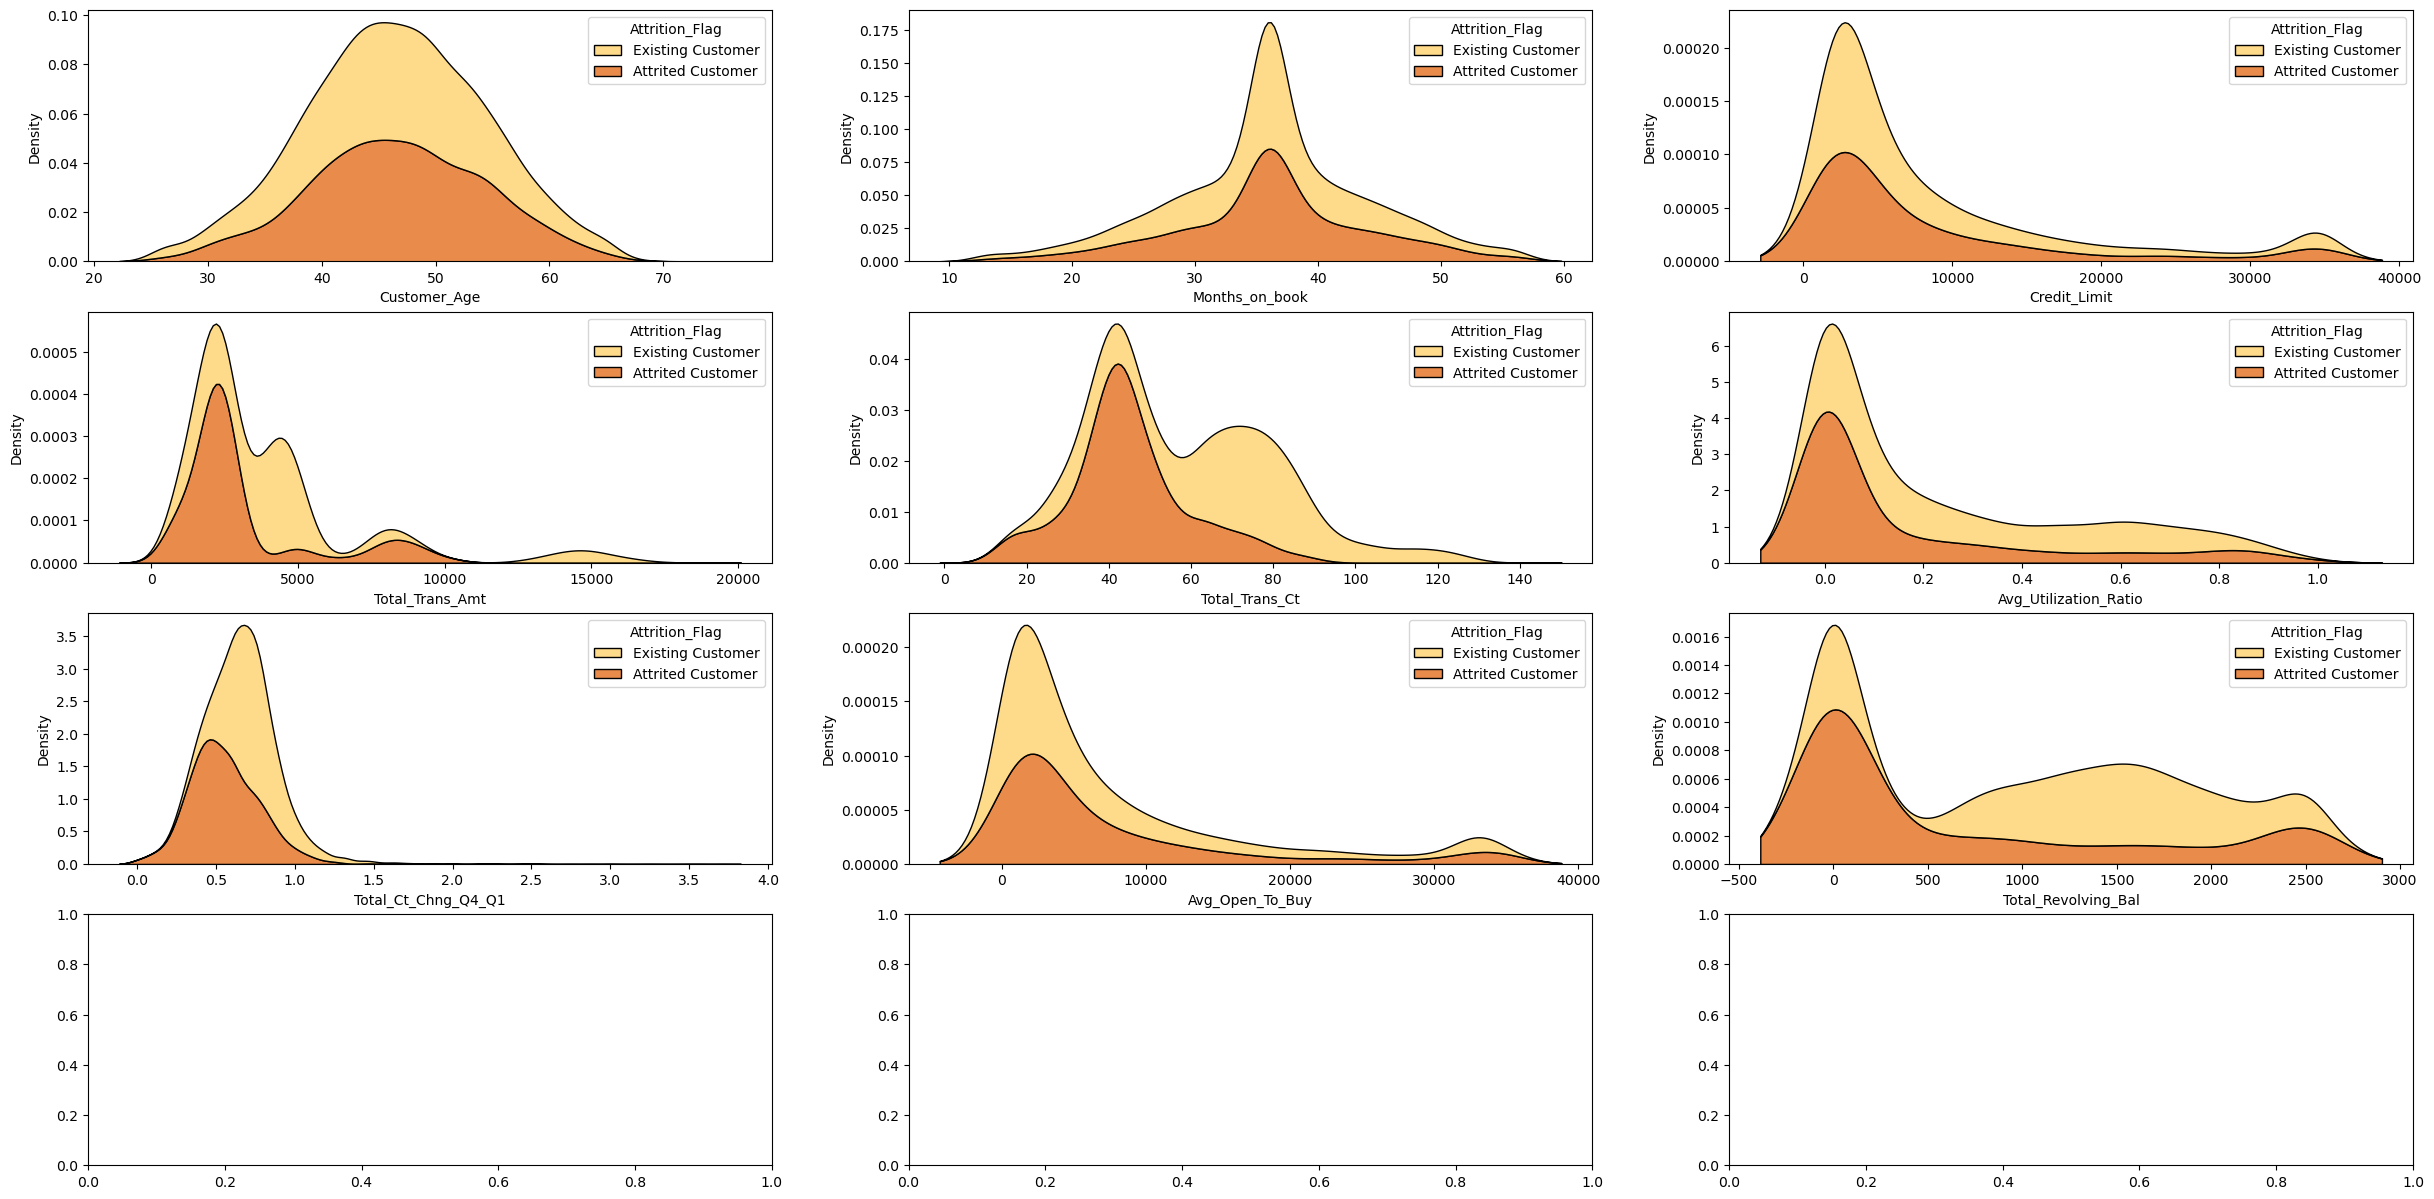

In [51]:
# Análisis de variables numéricas continuas mediante histogramas:
# Para el caso de variables numéricas continuas propongo graficarlas mediante histogramas solapando el histograma de los
# clientes que abandonaron y los que no. El objetivo es encontrar aquellas variables en las que el histograma de los clientes
# que abandonaron difiera del histograma de clientes existentes. Esto podría indicar que dicha variable se relaciona con 
# el comportamiento de abandono.

f, axs = plt.subplots(4, 3, figsize=(30, 15), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.kdeplot(data=df, x="Customer_Age", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 0])
sns.kdeplot(data=df, x="Months_on_book", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 1])
sns.kdeplot(data=df, x="Credit_Limit", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 2])
sns.kdeplot(data=df, x="Total_Trans_Amt", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 0])
sns.kdeplot(data=df, x="Total_Trans_Ct", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 1])
sns.kdeplot(data=df, x="Avg_Utilization_Ratio", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 2])
sns.kdeplot(data=df, x="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 0])
sns.kdeplot(data=df, x="Avg_Open_To_Buy", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 1])
sns.kdeplot(data=df, x="Total_Revolving_Bal", hue="Attrition_Flag", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 2])


#Conclusión:
#
# En este caso observamos que para algunas variables tales como la edad, la cantidad de meses en relación con el banco, 
# el límite de crédito, la tasa de utilización de la tarjeta, y la cantidad de dinero disponible para comprar, la 
# distribución de la población de clientes que abandonaron y los que permanecieron son sumamente parecidas, indicando
# que estas variables probablemente no esten relacionadas con el comportamiento de abandono.
# En cambio, para otras variables como la cantidad de dinero gastado en los últimos 12 meses, la cantidad de productos
# comprados en los últimos 12 meses, y la cantidad de saldo acumulado a pagar en los ultimos 12 meses se observan notables
# diferencias en la istribución de las poblaciones. En aquellos clientes con mayor cantidad de gastos hay una menor tendencia
# al abandono.
#
#
#
#
#
#
#


<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Total_Trans_Amt'>

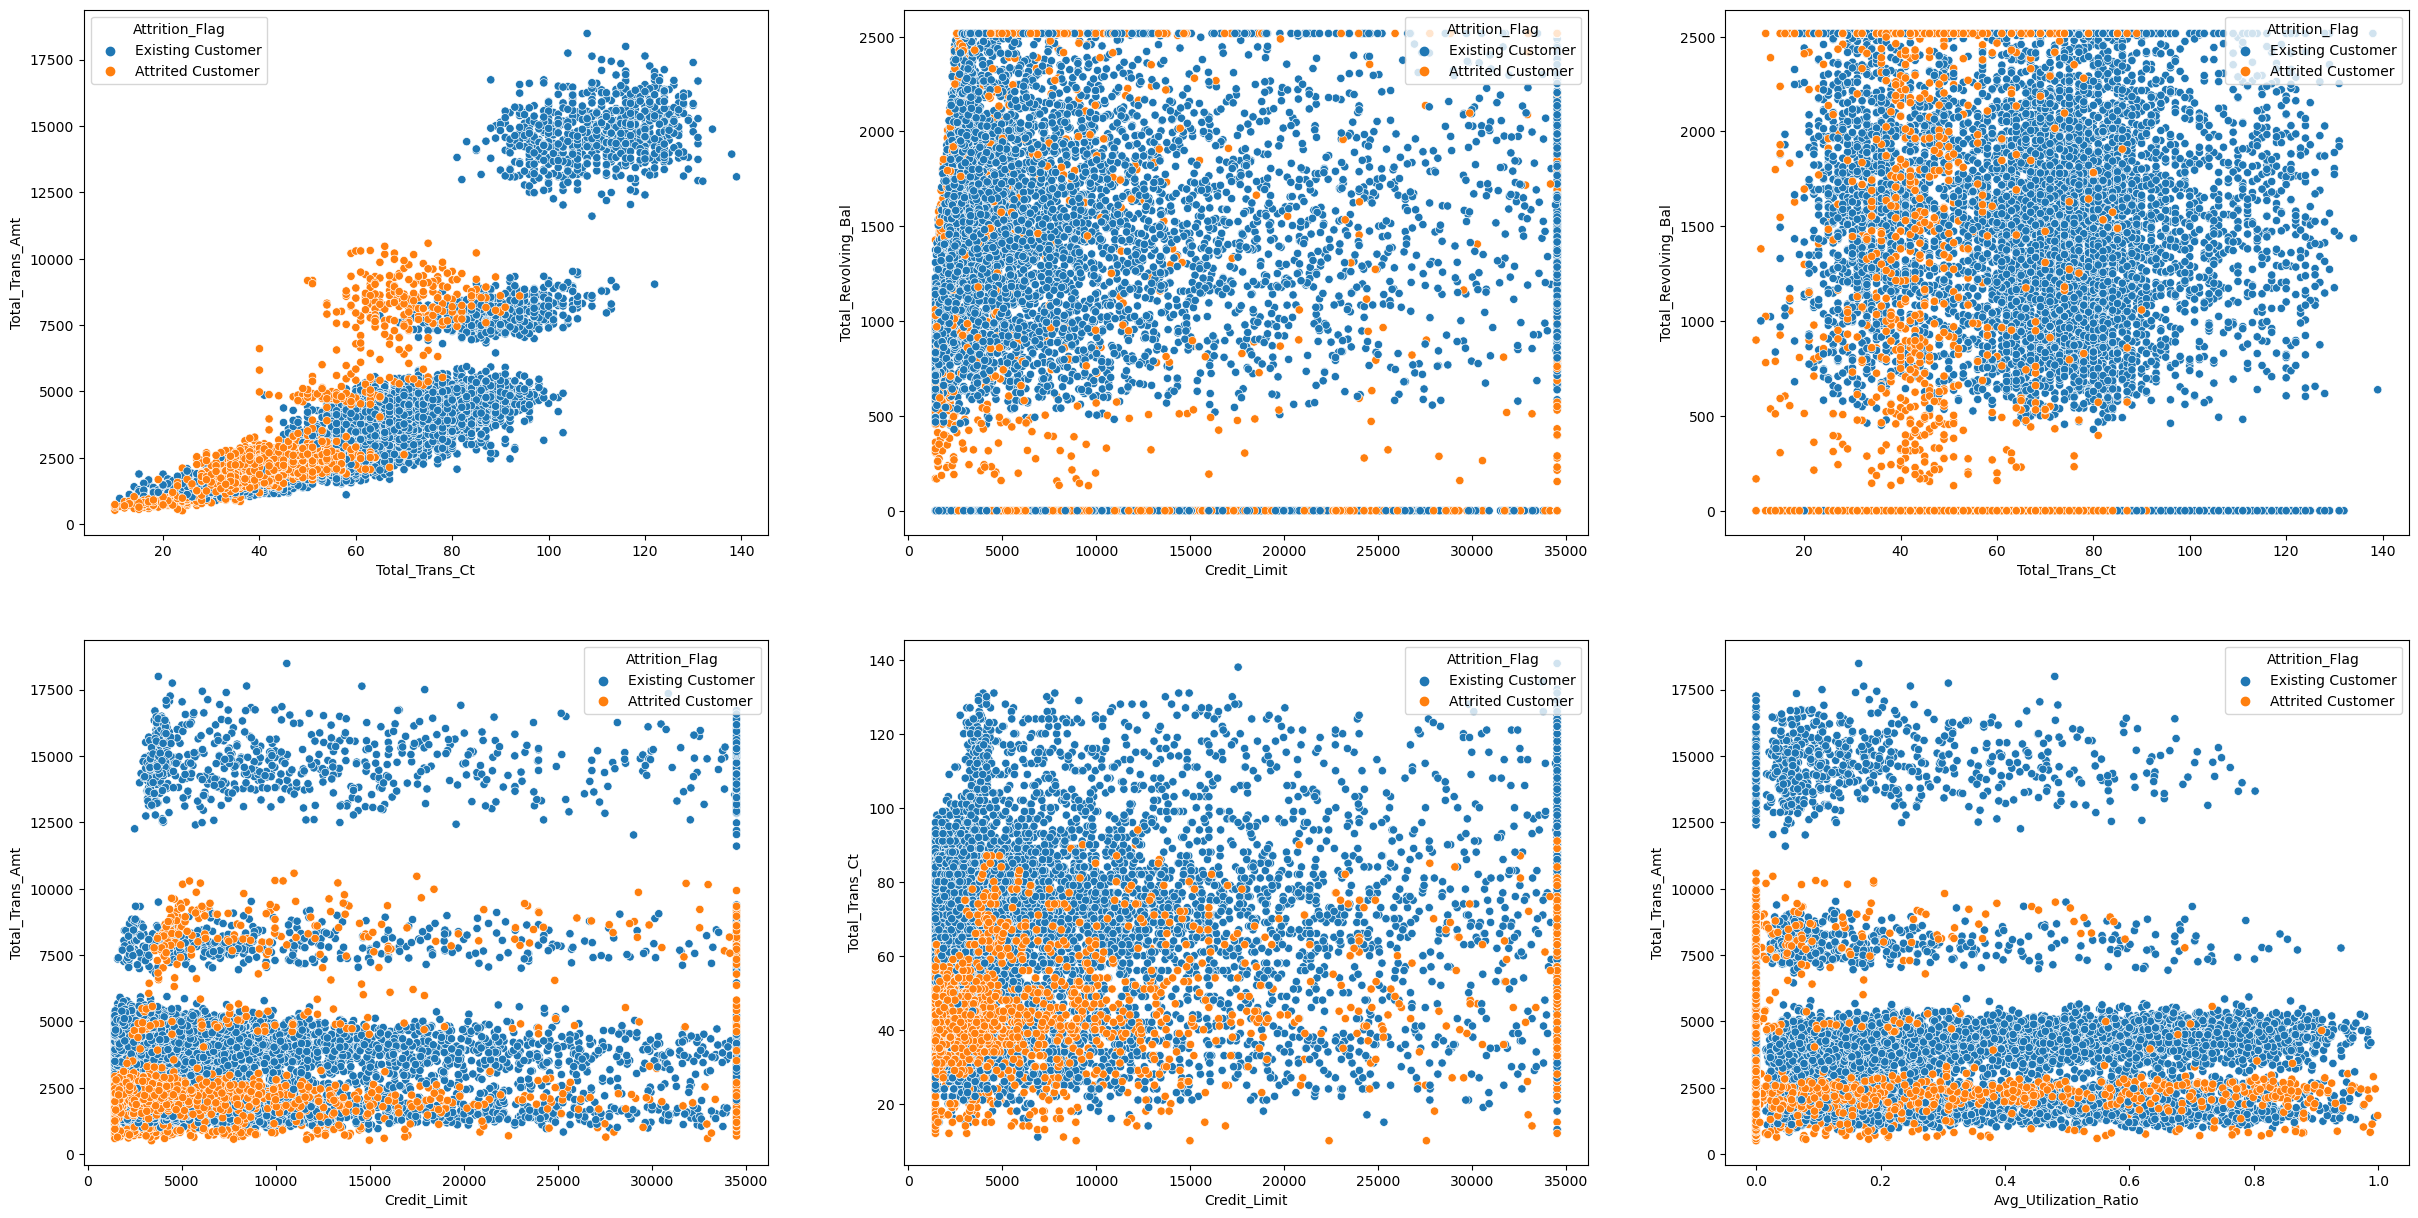

In [52]:
#Análisis Multivariado:
# El objetivo del análisis multivariado con gráficos scatter plot es poder reconocer patrones entre dos variables y 
# así tratar de encontrar diferencias entre la población de clientes que abandona y los que permanecen.
f, axs = plt.subplots(2, 3, figsize=(30, 15), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.scatterplot(data=df, x="Total_Trans_Ct", y="Total_Trans_Amt", hue="Attrition_Flag", ax=axs[0, 0])
sns.scatterplot(data=df, x="Credit_Limit", y="Total_Revolving_Bal", hue="Attrition_Flag", ax=axs[0, 1])
sns.scatterplot(data=df, x="Total_Trans_Ct", y="Total_Revolving_Bal", hue="Attrition_Flag", ax=axs[0, 2])
sns.scatterplot(data=df, x="Credit_Limit", y="Total_Trans_Amt", hue="Attrition_Flag", ax=axs[1, 0])
sns.scatterplot(data=df, x="Credit_Limit", y="Total_Trans_Ct", hue="Attrition_Flag", ax=axs[1, 1])
sns.scatterplot(data=df, x="Avg_Utilization_Ratio", y="Total_Trans_Amt", hue="Attrition_Flag", ax=axs[1, 2])

#Conclusión:
# Al graficar el total de cantidad de productos comprados contra el total de dinero gastado en los últimos 12 meses
# se observa una correlación lineal positiva entre ambas variables. Además se pueden observar 3 poblaciones de clientes:
# Una población de clientes que gastó altas cantidades de dinero contituida exclusivamente por clientes existentes;
# una población de clientes con gastos medios constituida por una mezcla de clientes que abandonan y clientes existentes;
# y una población de gastos bajos, también constituida por una mezcla de clientes que abandonan y clientes existentes.
# EN el caso de las poblaciones de gastos medios y bajos, se observa que los clientes existentes de ese nivel suelen
# comprar una mayor cantidad de productos que los clientes que abandonan. Esto podría estar representando hábitos de consumo
# diferenciales que podrían ser útiles para el modelo de clasificación.
# En el caso del saldo total a pagar acumulado vs cantidad de compras totales, si bien no se detecta una relación entre
# ambas variables, se observa que en aquellos clientes con saldos iguales a 0, el porcentaje de abandono es alto. Esto
# puede indicar que mantener los pagos de la tarjeta al día podría ser una señal de que el cliente va a abandonar.
#
#
# Para el resto de los gráficos no se encontró ningun patrón en particular.
#
#

<Axes: xlabel='Total_Relationship_Count', ylabel='Credit_Limit'>

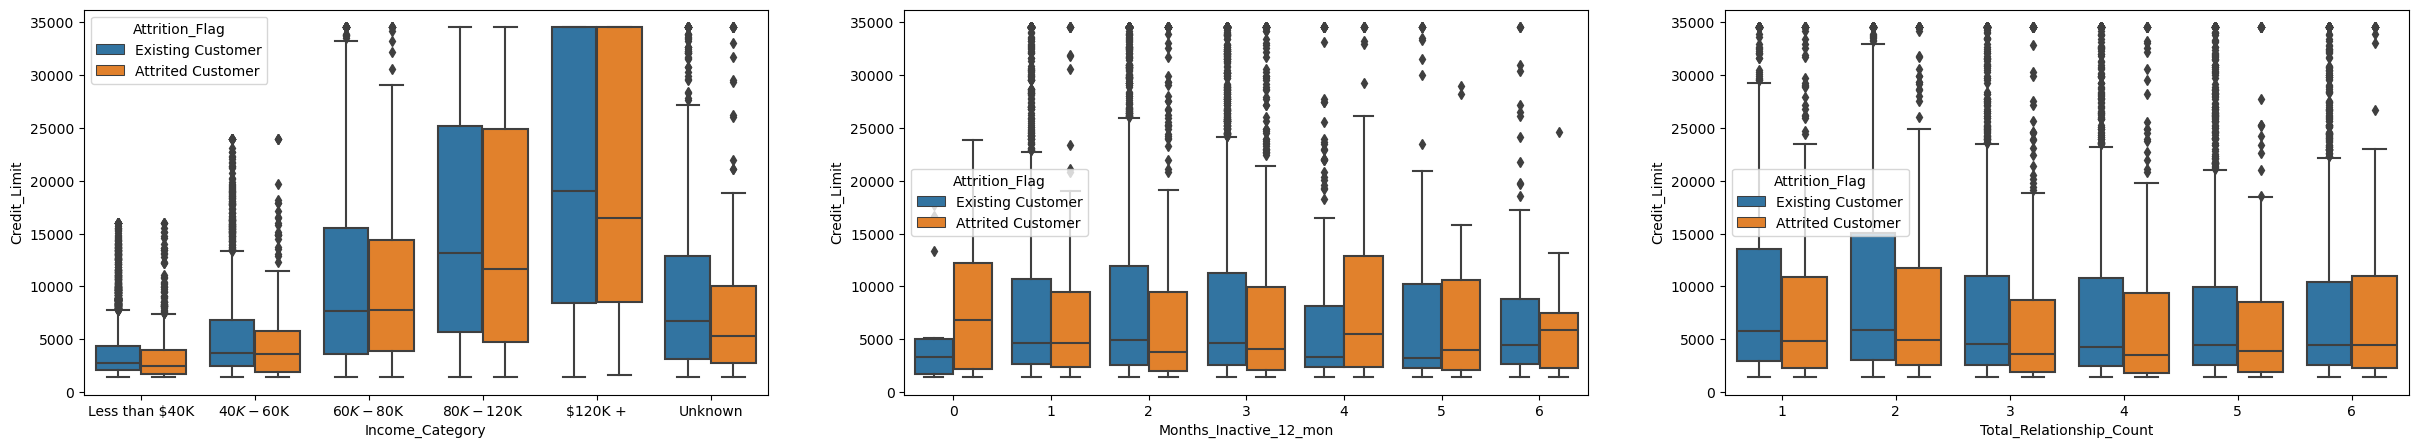

In [53]:
#Análisis mediante boxplot. El box plot permite estudiar variables continuas agrupadas por variables categóricas.
# Es posible que para una variable continua no haya diferencias entre clientes que abandonan y clientes que permanecen
# en términos globales, pero si agrupamos dicha variable en función de otra de caracter categórica, 
# puede que encontremos alguna diferencia en alguna categoría en particular.

f, axs = plt.subplots(1, 3, figsize=(30, 5), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.boxplot(data=df, x="Income_Category",          y="Credit_Limit", hue="Attrition_Flag", ax=axs[0], order=salarios )
sns.boxplot(data=df, x="Months_Inactive_12_mon",   y="Credit_Limit", hue="Attrition_Flag", ax=axs[1] )
sns.boxplot(data=df, x="Total_Relationship_Count", y="Credit_Limit", hue="Attrition_Flag", ax=axs[2] )

#Conclusión: Observamos que al evaluar el límite de crédito en función de los meses que el cliente permaneció inactivo, 
#para aquellos clientes que no tuvieron inactividad, los límites de crédito son sustantivamente mayores para los clientes
#que abandonaron que para los clientes que permanecieron.

# Análisis de clustering

In [54]:

#Importo librerías.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

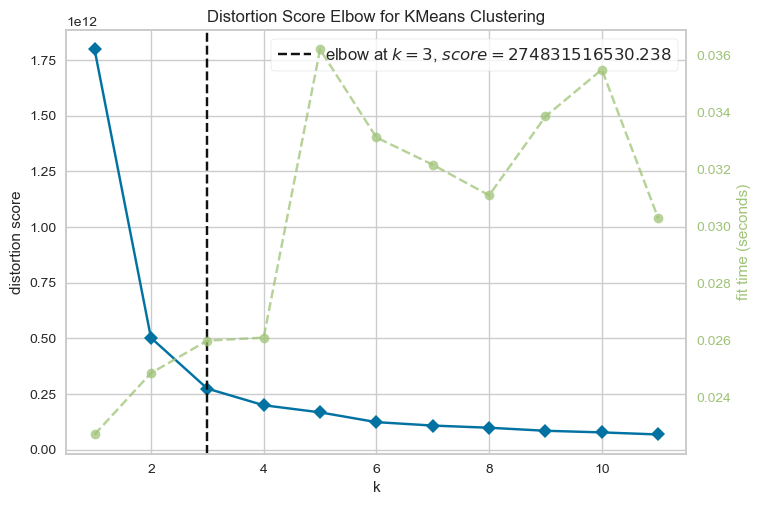

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Defino que variables voy a usar en el analisis de clusters
df_clustering = df.drop(columns=["CLIENTNUM", "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"])
#Uso el metodo del codo para evaluar numero optimo de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_clustering)
visualizer.show()

In [ ]:
#Estandarizacion de variables para el clustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

modelo= Pipeline([('scaler', StandardScaler()),

                  ('model',KMeans(n_clusters=3, max_iter=1000, init='random', random_state=42))
])

modelo.fit_predict(df_clustering)
preds = modelo.fit_predict(df_clustering)

,Customer_Age,Months_on_book,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1,Avg_Open_To_Buy,Total_Revolving_Bal
Cluster,,,,,,,,,
0,46.8,36.5,6395.8,3287.3,56.9,0.1,0.6,5927.8,468.0
1,46.1,35.8,24460.8,6915.8,76.5,0.1,0.7,23210.4,1250.4
2,46.0,35.5,3933.9,4275.5,66.5,0.5,0.8,2244.5,1689.4


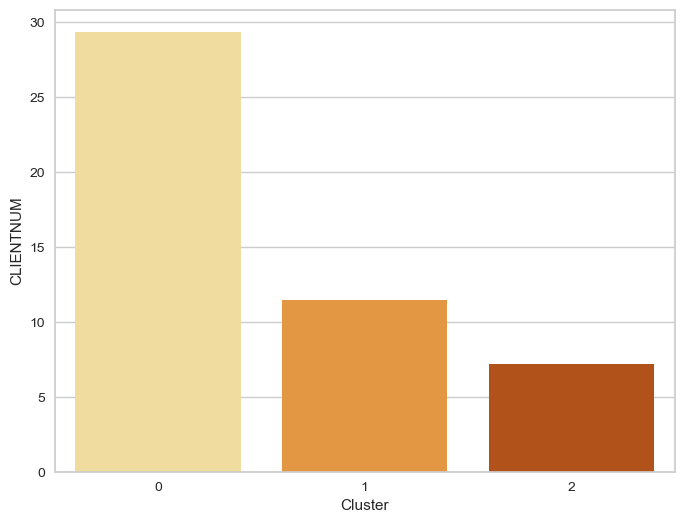

In [ ]:
#Creo una columna nueva en el data frame de clustering con las predicciones generadas por el modelo. Preguntar por el indice.
#Transformo el vector de numpy en un dataframe
preds=pd.DataFrame(preds)
#Reseteo el indice del datatframe original
df_reset = df.reset_index(drop=True)
#Agrego la columna de predicciones al dataframe original
df_clustering = pd.concat([df_reset, preds], axis=1)
df_clustering.rename(columns={0:"Cluster"}, inplace=True)
#Caluclo el % de abandono por cada cluster
df_clustering_attrited_agrupado = df_clustering[df_clustering["Attrition_Flag"] == "Attrited Customer"].groupby(df_clustering["Cluster"])["CLIENTNUM"].count()
df_clustering_t = df_clustering.groupby(df_clustering["Cluster"])["CLIENTNUM"].count()
df_clustering_attrited_division = (df_clustering_attrited_agrupado / df_clustering_t)*100
df_clustering_attrited_division = pd.DataFrame(df_clustering_attrited_division)
plt.figure(figsize=(8, 6))
sns.barplot(data=df_clustering_attrited_division, x=df_clustering_attrited_division.index, y=df_clustering_attrited_division["CLIENTNUM"],  palette="YlOrBr")
df_clustering.groupby(["Cluster"])[["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct","Avg_Utilization_Ratio","Total_Ct_Chng_Q4_Q1","Avg_Open_To_Buy","Total_Revolving_Bal"]].mean().round(1)
#df_clustering.groupby(["Cluster"])[["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct","Avg_Utilization_Ratio","Total_Ct_Chng_Q4_Q1","Avg_Open_To_Buy","Total_Revolving_Bal"]].std().round(1)
#Observamos que el cluster 0 tiene un mayor porcentaje de abandono que el resto de los clusters. Además este cluster se caracteriza por tener menor cantidad de compras, menor cantidad de gastos de compras, un nivel
# de límite de crédito intermedio y un menor saldo de deuda a pagar que el resto de los clusters. El análisis de clustering, a diferencia del análisis univariado
# reveló que el límite de crédito puede ser una variable importante para tener en cuenta en el modelo de predicción.





## Data Pre-processing

### Identificación de outliers

In [55]:
# Funcion iqr para la deteccion de outliers.
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_

In [56]:
# Creo un diccionario que contiene como clave lel nombre de la variable numérica y como valor una serie en la que los registros con valor 1 
# corresponden a outliers.


df.reset_index(drop=True, inplace=True)
dic_outliers = {}
for i in lista_variables_numericas:
    outliers = iqr_outlier(df[i], 1.5)
    dic_outliers.update({str(i):outliers})


In [57]:
# Creo un diccionario que contiene los indices de aquellos registros que continenen outliers.
dic_indices_outliers = {}
for i in lista_variables_numericas:
    out = dic_outliers[i]
    out = out.index[out==1].tolist()
    dic_indices_outliers.update({str(i):out})

In [58]:
#Cuantifico cuantos outliers hay por variable
for key in dic_indices_outliers:
    print(f'{key}:  {len(dic_indices_outliers[key])}')
 

CLIENTNUM:  0
Customer_Age:  2
Months_on_book:  386
Credit_Limit:  984
Total_Revolving_Bal:  0
Avg_Open_To_Buy:  963
Total_Amt_Chng_Q4_Q1:  396
Total_Trans_Amt:  896
Total_Trans_Ct:  2
Total_Ct_Chng_Q4_Q1:  394
Avg_Utilization_Ratio:  0


In [59]:
len(df)

10127

In [60]:
lista_indices_eliminar = []
for key in dic_indices_outliers:
    indices = dic_indices_outliers[key]
    for i in indices:
        if i not in lista_indices_eliminar:
            lista_indices_eliminar.append(i)
        else:
            continue
 

In [61]:
df.drop(index=lista_indices_eliminar, inplace = True)

In [62]:
len(df)

7509

# Feature selection

In [63]:

#A partir del EDA establemos las variables elegidas para construir el modelo de ML:
#Categóricas: #Month_Inactive, #Total_Relationship_Count, #Contacts_Count_12_mon,  Income_Category
#Numéricas: #Total_Trans_Ct,  Total_Trans_Amt,  Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1,  Credit_Limit
df_pre_modelo = df[["Attrition_Flag", "Total_Trans_Ct", "Total_Trans_Amt", "Total_Revolving_Bal", "Total_Ct_Chng_Q4_Q1", "Credit_Limit", "Total_Relationship_Count", "Income_Category", "Months_Inactive_12_mon" ]]


# Feature Engeneering

In [64]:

#Transformamos la variable de Attrition_Flag mediante la técnica de one hot encoding. La asignamos dentro de la variable y y la sacamos del df.
df_pre_modelo = pd.get_dummies(df_pre_modelo, columns=["Attrition_Flag"], dtype=int, drop_first=True)
y = df_pre_modelo["Attrition_Flag_Existing Customer"]
df_pre_modelo.drop(columns=['Attrition_Flag_Existing Customer'], inplace=True)


In [65]:
#Transformamos la variable Income_Category mediante la técnica de label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lista_encoding = ['Income_Category']
lista_codigos = []
for i in lista_encoding:
    df_pre_modelo[i] = encoder.fit_transform(df_pre_modelo[i])
    codigo = dict(zip(encoder.classes_,range(len(encoder.classes_))))
    lista_codigos.append(codigo)


In [66]:
print(lista_codigos)

[{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}]


## Data Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
#Estandarizo las variables
columns_names = df_pre_modelo.columns.to_list()
scaler = MinMaxScaler()
df_pre_modelo = scaler.fit_transform(df_pre_modelo)
df_pre_modelo = pd.DataFrame(df_pre_modelo)
df_pre_modelo.columns = columns_names

In [68]:
print(columns_names)

['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Credit_Limit', 'Total_Relationship_Count', 'Income_Category', 'Months_Inactive_12_mon']


# Modelo de Regresión Logística

In [69]:

X = df_pre_modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train.rename("Existing_customer")
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [71]:
preds = clf.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm

array([[ 233,  185],
       [  68, 1992]], dtype=int64)

In [72]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       418
           1       0.92      0.97      0.94      2060

    accuracy                           0.90      2478
   macro avg       0.84      0.76      0.79      2478
weighted avg       0.89      0.90      0.89      2478



# Modelo KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
modelo_2 = KNeighborsClassifier(n_neighbors=10)
modelo_2.fit(X_train, y_train)
preds2 = modelo_2.predict(X_test)
cm2= confusion_matrix(y_test, preds2)
cm2

array([[ 301,  117],
       [  87, 1973]], dtype=int64)

In [75]:
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       418
           1       0.94      0.96      0.95      2060

    accuracy                           0.92      2478
   macro avg       0.86      0.84      0.85      2478
weighted avg       0.92      0.92      0.92      2478



# Modelo RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
modelo_3 = RandomForestClassifier(n_estimators = 100)
modelo_3.fit(X_train, y_train)
preds3 = modelo_3.predict(X_test)
cm3= confusion_matrix(y_test, preds3)
cm3

array([[ 335,   83],
       [  48, 2012]], dtype=int64)

In [78]:
print(metrics.classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       418
           1       0.96      0.98      0.97      2060

    accuracy                           0.95      2478
   macro avg       0.92      0.89      0.90      2478
weighted avg       0.95      0.95      0.95      2478



In [79]:
# El modelo de random forest obtuvo las mejores metricas asi que procedemos a optimizar este modelo.

In [80]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score

In [81]:
# Las variables target estan desbalanceadas. Como los modelos basados en arboles tienden al overfitting, se decide hacer un undersampling para balancear las variables sin aumentar el riesgo de overfitting.
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [82]:
X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [83]:
param_grid = {
    'n_estimators': [20, 40, 60],
    'max_depth': [8, 10, 12],
    'min_samples_split': [5, 7, 9],
    'min_samples_leaf': [3, 5, 10],
    
}

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer_class_0 = make_scorer(f1_score, pos_label=0)
grid_search = GridSearchCV(clf, param_grid, cv=S_kfold, scoring=f1_scorer_class_0, return_train_score=True, verbose=3)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=(train=0.950, test=0.890) total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=(train=0.941, test=0.871) total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=(train=0.951, test=0.924) total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=(train=0.944, test=0.865) total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=(train=0.945, test=0.900) total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=40;, score=(train=0.950, test=0.891) total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=40;, score=(train=0.945, test=0.874) total

In [84]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
cm4= confusion_matrix(y_test, y_pred)
print(cm4)
print(metrics.classification_report(y_test, y_pred))

[[ 380   38]
 [ 119 1941]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       418
           1       0.98      0.94      0.96      2060

    accuracy                           0.94      2478
   macro avg       0.87      0.93      0.89      2478
weighted avg       0.94      0.94      0.94      2478



# Conclusiones:

A la hora de evaluar el desempeño de los modelos de clasificación es importante tener en cuenta la lógica del negocio. En el caso de la predicción de abandono obtener Falsos positivos (clientes que se clasifican como abandonadores pero no lo son) implicaría un gasto inecesario de recursos por parte de la empresa para retenerlo. Por otro lado, los resultados Falsos Negativos (clientes que se clasifican como no abandonadores pero que terminan abandonando) implican un evento practicamente irreversible que también generaría pérdidas económicas en la empresa. Considero que el modelo debería tratar de obtener la menor cantidad de Falsos Negativos, puesto que estos tendrían un impacto mayor en el negocio, de modo tal que las dos métricas más importantes serían el recall para la categoría 0 y el F1-score. La precisión no sería una métrica muy útil debido a que se observa desbalance entre las categorías target 0 (abandono) y 1 (no abandono) a favor de la 1. Considerando lo anterior, podemos ver como el modelo Random Forest es el que obtiene un mejor desempeño, puesto que tiene valores mayores de recall y F1-score. 

In [85]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', best_estimator)
])
pipeline_bundle = {
    "encoder": encoder,
    "pipeline": pipeline
}

In [86]:
# Almacenamos el modelo usando pickle.
import pickle
with open('ml_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline_bundle, f)

In [90]:
import sklearn
print(sklearn.__version__)

1.3.0
